C:\Users\Administrator\AppData\Local\Temp\ipykernel_10800\3899520729.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download([STOCK, MARKET], start=START_DATE, end=END_DATE)['Close']
[*********************100%***********************]  2 of 2 completed



CAPM ANALYSIS REPORT: AAPL
Period: 2019-01-01 to 2024-01-01
--------------------------------------------------
BETA: 1.2156
→ Aggressive: riskier than the market

ALPHA (Daily): 0.000769
R-SQUARED: 0.6466
--------------------------------------------------
EXPECTED ANNUAL RETURN (CAPM): 10.69%


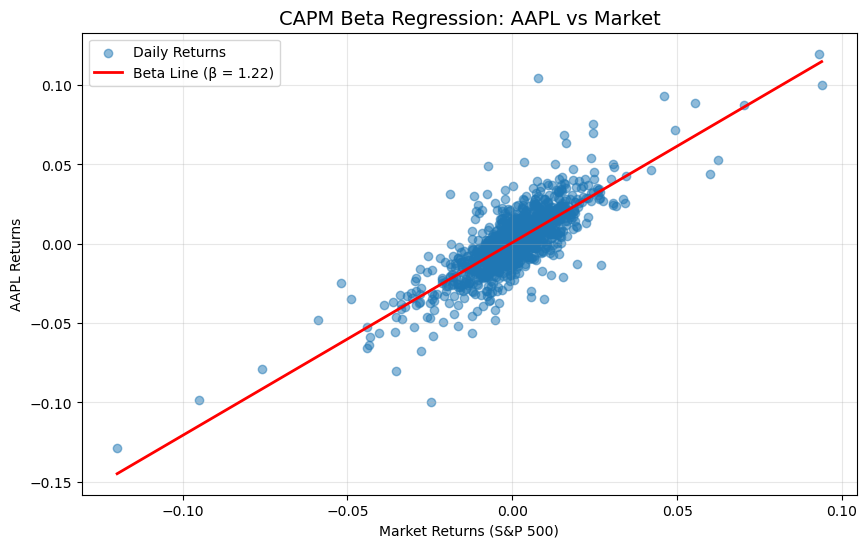

In [4]:
# =========================================================
# ASSET PRICING PROJECT 01: CAPM & BETA ESTIMATION
# Author: Fares Awwad-Zeidan
# Level: Beginner
# Objective: Calculate Market Beta and Expected Return 
#            using the Capital Asset Pricing Model (CAPM).
# =========================================================

import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ==========================================
# 1. PARAMETERS
# ==========================================
STOCK = 'AAPL'        # Asset under analysis
MARKET = '^GSPC'      # Market benchmark (S&P 500)
START_DATE = '2019-01-01'
END_DATE = '2024-01-01'
RISK_FREE_RATE = 0.04 # 4% annual risk-free rate

# ==========================================
# 2. DATA FETCHING
# ==========================================
print(f"Downloading data for {STOCK} and {MARKET}...")
data = yf.download([STOCK, MARKET], start=START_DATE, end=END_DATE)['Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Rename columns explicitly (safe)
returns = returns.rename(columns={STOCK: 'Stock', MARKET: 'Market'})

# ==========================================
# 3. REGRESSION (BETA ESTIMATION)
# ==========================================
# CAPM: R_stock = Alpha + Beta * R_market + error

y = returns['Stock']
X = sm.add_constant(returns['Market'])

model = sm.OLS(y, X).fit()

beta = model.params['Market']
alpha = model.params['const']
r_squared = model.rsquared

# ==========================================
# 4. EXPECTED RETURN (CAPM)
# ==========================================
market_premium = 0.055  # 5.5% market risk premium
expected_return = RISK_FREE_RATE + beta * market_premium

# ==========================================
# 5. REPORT
# ==========================================
print("\n" + "=" * 50)
print(f"CAPM ANALYSIS REPORT: {STOCK}")
print("=" * 50)
print(f"Period: {START_DATE} to {END_DATE}")
print("-" * 50)

print(f"BETA: {beta:.4f}")
if beta > 1:
    print("→ Aggressive: riskier than the market")
elif beta < 1:
    print("→ Defensive: less risky than the market")
else:
    print("→ Market-level risk")

print(f"\nALPHA (Daily): {alpha:.6f}")
print(f"R-SQUARED: {r_squared:.4f}")

print("-" * 50)
print(f"EXPECTED ANNUAL RETURN (CAPM): {expected_return*100:.2f}%")
print("=" * 50)

# ==========================================
# 6. VISUALIZATION
# ==========================================
plt.figure(figsize=(10, 6))
plt.scatter(returns['Market'], returns['Stock'], alpha=0.5, label='Daily Returns')

x_range = np.linspace(returns['Market'].min(), returns['Market'].max(), 100)
y_pred = alpha + beta * x_range
plt.plot(x_range, y_pred, color='red', linewidth=2, label=f'Beta Line (β = {beta:.2f})')

plt.title(f'CAPM Beta Regression: {STOCK} vs Market', fontsize=14)
plt.xlabel('Market Returns (S&P 500)')
plt.ylabel(f'{STOCK} Returns')
plt.legend()
plt.grid(True, alpha=0.3)

# ✅ SAVE FIGURE (CRITICAL)
plt.savefig("capm_beta_regression.png", dpi=300, bbox_inches="tight")
plt.show()
